### Data import and description for the dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# set style
plt.style.use('seaborn')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [2]:
# Read excel file and combine different sheets into one dataframe
df = pd.concat(pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name=None), ignore_index=True)
df

/opt/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,0,0.000000,0,0.000000
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,0,0.000000,27,0.355263
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,0,0.000000,4,0.058824
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,0,0.000000,16,0.135593


In [3]:
# Description of the dataframe
df.describe()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,44.803859,40.117363,13.456592,0.276282,5.966238,0.102214
std,93.165049,9.741459,41.103936,0.242273,14.123466,0.131444
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,33.000000,1.000000,0.068523,0.000000,0.000000
50%,20.000000,40.000000,4.000000,0.237327,1.000000,0.058824
75%,44.750000,46.000000,11.000000,0.444444,5.000000,0.166667
max,1657.000000,75.000000,702.000000,1.000000,131.000000,0.818182


In [4]:
# Check total null data in each column
df.isnull().sum()

Event Name                         0
Activity Code                      0
Activity Description               0
Location Code                      0
Location Description               0
Group Code                         0
Group Description                  0
Event Date                         0
Participated                       0
Average Age                        0
First Time Attendees               0
Percentage First Time Attendees    0
Major Prospects                    0
Percentage Major Prospect          0
dtype: int64

In [5]:
#Check for duplicate entries
df.duplicated().value_counts()

False    622
dtype: int64

In [6]:
#Find correlation between each column
corr = df.corr()
corr

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
Participated,1.000000,0.037616,0.835996,0.047840,0.658973,0.113415
Average Age,0.037616,1.000000,-0.048204,-0.152633,0.308342,0.549320
First Time Attendees,0.835996,-0.048204,1.000000,0.281961,0.420884,0.051069
Percentage First Time Attendees,0.047840,-0.152633,0.281961,1.000000,0.000751,0.067701
Major Prospects,0.658973,0.308342,0.420884,0.000751,1.000000,0.481370
Percentage Major Prospect,0.113415,0.549320,0.051069,0.067701,0.481370,1.000000


<AxesSubplot:>

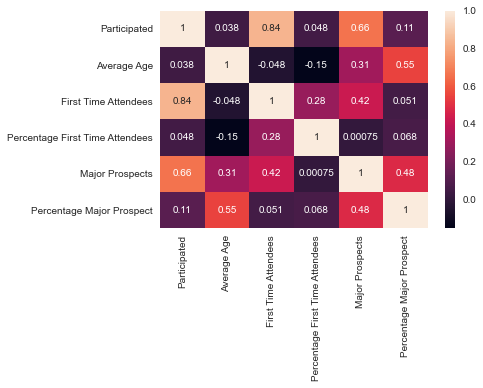

In [7]:
sns.heatmap(corr, annot=True)

## Analyzing Location Code

In [8]:
# Turn Location Code to Categorical Values
# Check the second digit of Location Code to receive the location where the event was held
# There are a total of 5 categories, which are West, DMV(Washignton DC/Maryland/Virginia), Southeast, Online, and other
locationCode = []

for i in df['Location Code']:
    if i[1] == 'W':
        locationCode.append('West')
    elif i[1] == 'D':
        locationCode.append('DMV')
    elif i[1] == 'S':
        locationCode.append('Southeast')
    elif i[1] == 'N':
        locationCode.append('Northeast')
    elif i[1] == 'O':
        locationCode.append('Online')
    else:
        locationCode.append('Other')
        
# Assign each category in Location Group column
df['Location Group'] = locationCode

Location Group
DMV          0.31
Northeast    0.19
Online       0.35
Southeast    0.36
West         0.30
dtype: float64
Location Group
DMV          0.13
Northeast    0.20
Online       0.05
Southeast    0.23
West         0.14
dtype: float64


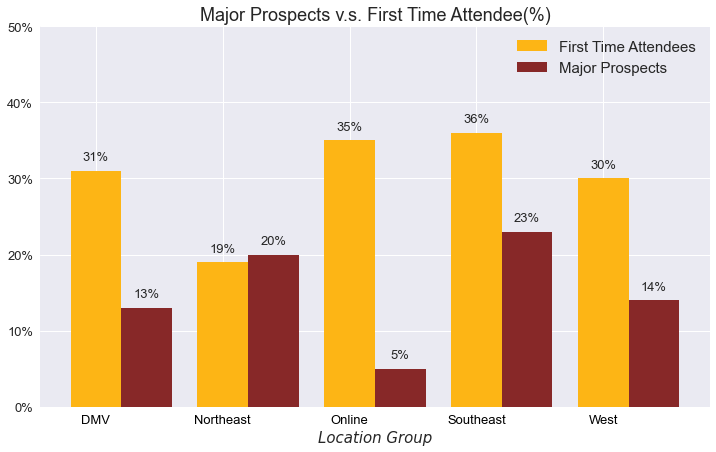

In [9]:
# Percentage of First Time Attendees in each location group
numParticipant = df.groupby("Location Group")['Participated'].sum()
numFirstTime = df.groupby("Location Group")['First Time Attendees'].sum()
percentageFirstTime = round((numFirstTime / numParticipant),2).drop(labels=['Other'])
print(percentageFirstTime)

# Percentage of Major Prospects in each location group
numMajor = (df.groupby("Location Group")['Major Prospects'].sum())
percentageMajor = round((numMajor/numParticipant),2).drop(labels=['Other'])
print(percentageMajor)

# Bar chart for the percentage of First Time Attendees in each location group
x_indexes = np.arange(len(percentageFirstTime))
width =0.4

fig, ax = plt.subplots(figsize=(12,7)) 


a1 = ax.bar(x_indexes, percentageFirstTime, width=width, label = 'First Time Attendees',
        color=['#fdb515',])
a2 = ax.bar(x_indexes+width, percentageMajor, width=width, label = 'Major Prospects',
        color=['#872828',])

ax.set_title('Major Prospects v.s. First Time Attendee(%)',fontsize=18)
ax.set_xlabel('Location Group', fontsize=15,fontfamily = 'DejaVu Sans',fontstyle='italic')

# Reset Index
cats = ['DMV', 'Northeast', 'Online', 'Southeast', 'West']
num = ['0%', '10%', '20%', '30%', '40%', '50%']

# Set x and y ticks
ax.set_xticks(x_indexes)
ax.set_xticklabels(cats)
ax.xaxis.set_tick_params(labelsize=13,colors='k',)
ax.set_yticks((0,0.1,0.2,0.3,0.4,0.5))
ax.set_yticklabels(num)
ax.yaxis.set_tick_params(labelsize=13)
ax.legend(fontsize=15)

numindex = np.arange(len(percentageFirstTime.index))
value1 = np.array(percentageFirstTime)
value2 = np.array(percentageMajor)

for a, b in zip(numindex, value1):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)
for a, b in zip(numindex, value2):
    ax.text(a+0.4,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

plt.show()

## Analyzing Group Code

In [10]:
# Turn Group Code into Categorical Values
# Check the third digit of Group Code to receive the category of the group
# There are a total of 5 categories, which are General, Carrer, Students & Alumni, Membership, and other
group = []

for i in df['Group Code']:
    if i[2] == '9':
        group.append('General')
    elif i[2] == '4':
        group.append('Career')
    elif i[2] == 'Z' or i[1] == 'W' or i[1] == 'Y' or i[1] == 'S':
        group.append('Students & Alumni')
    elif i[2] == 'M':
        group.append('Membership')
    else:
        group.append('Other')

# Assign each category in Group column
df['Group'] = group

Group
Students & Alumni    0.47
General              0.27
Career               0.26
Membership           0.23
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


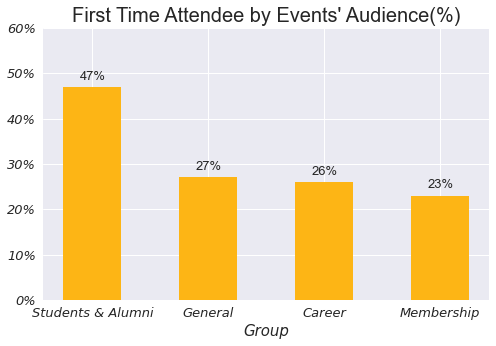

In [11]:
# Percentage of First Time Attendees in each group
groupFirstTime = df.groupby('Group')['First Time Attendees'].sum()
groupParticipate = df.groupby('Group')['Participated'].sum()
percentageFirstTime = round((groupFirstTime / groupParticipate),2).drop(labels=['Other'])
percentageFirstTime = percentageFirstTime.sort_values(ascending=False)
print(percentageFirstTime)

# Bar chart for the percentage of First Time Attendees in each group
width =0.5

fig, ax = plt.subplots(figsize=(8,5)) 

g1 = ax.bar(percentageFirstTime.index, percentageFirstTime, width=width, color=['#fdb515'])

ax.set_title("First Time Attendee by Events' Audience(%)", fontsize=20)
ax.set_xlabel('Group', fontsize=15, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Reset Index
cats = ['Students & Alumni', 'General', 'Career', 'Membership']
num = ['0%','10%', '20%','30%','40%', '50%', '60%']

# set x and y ticks
ax.set_xticklabels(cats, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.xaxis.set_tick_params(labelsize=13)
ax.set_yticks((0,0.1,0.2,0.3,0.4,0.5,0.6))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.yaxis.set_tick_params(labelsize=13)

# Set the bar label  
numindex = np.arange(len(percentageFirstTime.index))
value = np.array(percentageFirstTime)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

plt.show()

Group
Membership           0.18
Career               0.16
General              0.15
Students & Alumni    0.05
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


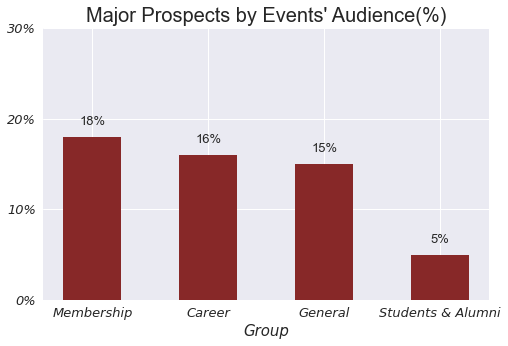

In [12]:
# Pertanage of Major Prospects in each group
groupMajorProspects = df.groupby('Group')['Major Prospects'].sum()
percentageMajorProspects = round((groupMajorProspects / groupParticipate),2).drop(labels=['Other'])
percentageMajorProspects = percentageMajorProspects.sort_values(ascending=False)
print(percentageMajorProspects)

# Bar chart for the percentage of First Time Attendees in each group
width =0.5

fig, ax = plt.subplots(figsize=(8,5)) 

g2 = ax.bar(percentageMajorProspects.index, percentageMajorProspects, width=width, color=['#872828'])

ax.set_title("Major Prospects by Events' Audience(%)", fontsize=20)
ax.set_xlabel('Group', fontsize=15, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Reset Index
cats = ['Membership', 'Career', 'General', 'Students & Alumni']
num = ['0%','10%', '20%','30%']

ax.set_xticklabels(cats, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.xaxis.set_tick_params(labelsize=13)
ax.set_yticks((0,0.1,0.2,0.3))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.yaxis.set_tick_params(labelsize=13)

# Set the bar label  
numindex = np.arange(len(percentageMajorProspects.index))
value = np.array(percentageMajorProspects)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

plt.show()

In [13]:
# Turn Group Code into Categorical Values
# Check the second digit of Group Code to receive the event purpose of the group
# There are a total of 7 contents, which are Social, ProDev, Service, Athletics, Advocacy, Stewardship, and other
groupContents=[]

for i in df['Group Code']:
    if i[1] == 'S':
        groupContents.append('Social')
    elif i[1] == 'C':
        groupContents.append('ProDev')
    elif i[1] == 'O':
        groupContents.append('Service')
    elif i[1] == 'A':
        groupContents.append('Athletics')
    elif i[1] == 'D':
        groupContents.append('Advocacy')
    elif i[1] == 'H':
        groupContents.append('Stewardship')    
    else:
        groupContents.append('Other')

# Assign each contents in Group Contents column        
df['Group Contents'] = groupContents

Group Contents
Social         0.34
Service        0.32
Athletics      0.30
ProDev         0.29
Advocacy       0.20
Stewardship    0.19
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


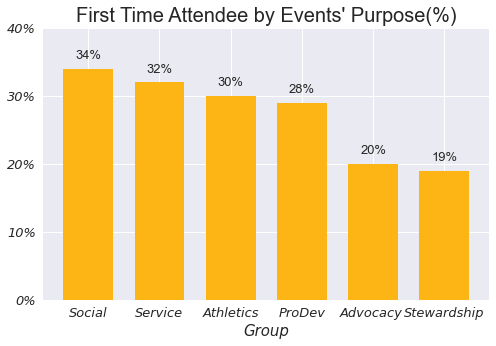

In [14]:
# Percentage of First Time Attendees in each group contents
groupContentFirstTime = df.groupby('Group Contents')['First Time Attendees'].sum()
groupContentParticipate = df.groupby('Group Contents')['Participated'].sum()
percentagegroupContent = round((groupContentFirstTime / groupContentParticipate),2).drop(labels=['Other'])
percentagegroupContent = percentagegroupContent.sort_values(ascending=False)
print(percentagegroupContent)

# Bar chart for the percentage of First Time Attendees in each group contents
width =0.7
fig, ax = plt.subplots(figsize=(8,5)) 

g3 = ax.bar(percentagegroupContent.index, percentagegroupContent, width=width, color=['#fdb515'])

ax.set_title("First Time Attendee by Events' Purpose(%)", fontsize=20)
ax.set_xlabel('Group', fontsize=15, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Reset Index
cats = ['Social', 'Service', 'Athletics', 'ProDev', 'Advocacy ', 'Stewardship']
num = ['0%','10%', '20%','30%','40%']

# ax.set_xticks(x_indexes)
ax.set_xticklabels(cats, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.xaxis.set_tick_params(labelsize=13)
ax.set_yticks((0,0.1,0.2,0.3,0.4))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.yaxis.set_tick_params(labelsize=13)

# Set the bar label  
numindex = np.arange(len(percentagegroupContent.index))
value = np.array(percentagegroupContent)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

plt.show()

Group Contents
Advocacy        123
Athletics      1003
Other           204
ProDev          520
Service          16
Social         1212
Stewardship     633
Name: Major Prospects, dtype: int64
Group Contents
Stewardship    0.27
Athletics      0.17
Advocacy       0.12
Social         0.11
ProDev         0.09
Service        0.05
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


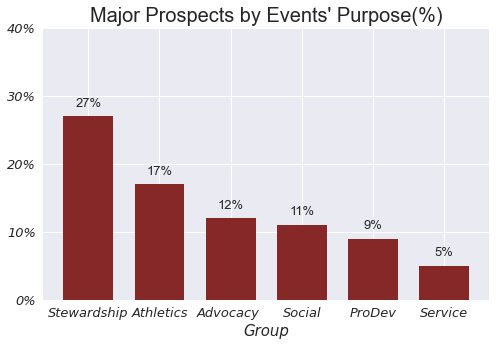

In [15]:
# Pertanage of Major Prospects in each group contents
groupContentMajorProspects = df.groupby('Group Contents')['Major Prospects'].sum()
percentagegroupContent = round((groupContentMajorProspects / groupContentParticipate),2).drop(labels=['Other'])
percentagegroupContent = percentagegroupContent.sort_values(ascending=False)
print(groupContentMajorProspects)
print(percentagegroupContent)

# Bar chart for the percentage of First Time Attendees in each group
width =0.7

fig, ax = plt.subplots(figsize=(8,5)) 

g2 = ax.bar(percentagegroupContent.index, percentagegroupContent, width=width, color=['#872828'])

ax.set_title("Major Prospects by Events' Purpose(%)", fontsize=20)
ax.set_xlabel('Group', fontsize=15, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Reset Index
cats = ['Stewardship', 'Athletics', 'Advocacy ', 'Social', 'ProDev', 'Service']

ax.set_xticklabels(cats, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.xaxis.set_tick_params(labelsize=13)
ax.set_yticks((0,0.1,0.2,0.3,0.4))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
ax.yaxis.set_tick_params(labelsize=13)

# Set the bar label  
numindex = np.arange(len(percentagegroupContent.index))
value = np.array(percentagegroupContent)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

## Analyzing Acitivity Code

Activity Code
PEZGB    885
PEAVB    702
PEZHC    420
PEZFT    296
PEZRC    247
PEZMB    167
PEZMD    140
PEZHA    139
PESFF    138
PEADG    134
Name: First Time Attendees, dtype: int64


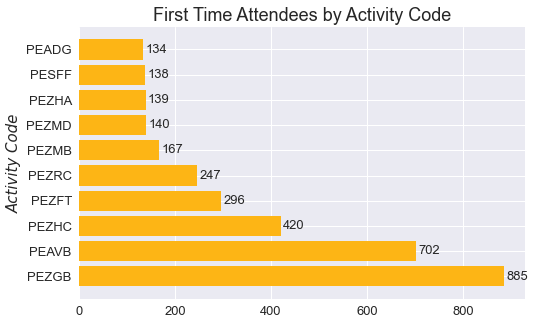

In [16]:
# Total First Time Attendees for each Activity Code
grpFirstTimeAttendees = (df.groupby("Activity Code")['First Time Attendees'].sum()).sort_values(ascending = False)
grpFirstTimeAttendeestop10 = grpFirstTimeAttendees.head(10)
print(grpFirstTimeAttendeestop10)

# Bar chart for the Number of First Time Attendees for each Activity Code
fig, ax = plt.subplots(figsize=(8,5))
plt.barh(grpFirstTimeAttendeestop10.index, grpFirstTimeAttendeestop10, color=['#fdb515'])

# Set title and y axies labels
ax.set_title('First Time Attendees by Activity Code', fontsize=18)
ax.set_ylabel('Activity Code', fontsize=15, fontfamily = 'DejaVu Sans', fontstyle='oblique')

# Set x and y ticks
ax.xaxis.set_tick_params(labelsize=13,)
ax.yaxis.set_tick_params(labelsize=13)
num_ = range(0,10,1)

# Set the bar label  
for a, b in zip(grpFirstTimeAttendeestop10.values, num_):
    ax.text(a+5, b, str(a), ha ='left', va='center', fontsize=13)

plt.show()

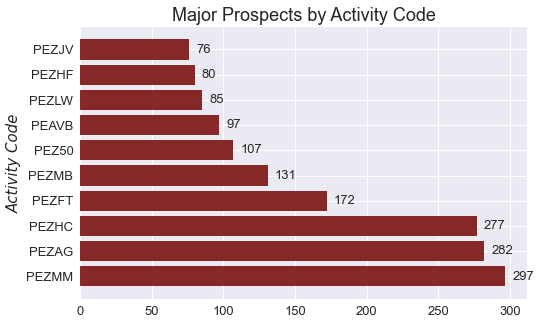

In [17]:
# Total Major Prospects for each Activity Code
grpMajorProspects = (df.groupby("Activity Code")['Major Prospects'].sum()).sort_values(ascending = False)
grpMajorProspectstop10 = grpMajorProspects.head(10)

# Bar chart for the Number of First Time Attendees for each Activity Code
fig, ax = plt.subplots(figsize=(8,5))
plt.barh(grpMajorProspectstop10.index, grpMajorProspectstop10, color=['#872828'])

# Set title and y axies labels
ax.set_title('Major Prospects by Activity Code', fontsize=18)
ax.set_ylabel('Activity Code', fontsize=15, fontfamily = 'DejaVu Sans', fontstyle='oblique')

# Set x and y ticks
ax.xaxis.set_tick_params(labelsize=13,)
ax.yaxis.set_tick_params(labelsize=13)
num_ = range(0,10,1)

# Set the bar label  
for a, b in zip(grpMajorProspectstop10.values, num_):
    ax.text(a+5, b, str(a), ha ='left', va='center', fontsize=13)

plt.show() 

## Analyzing Age

In [18]:
# Assign the Average age to five groups and name the column "Age Group"
ageGroup = []
for i in df['Average Age']:
    if i < 30:
        ageGroup.append('Under 30')   
    elif i >= 30 and i <= 39:
        ageGroup.append('30-39') 
    elif i >= 40 and i <= 49:
        ageGroup.append('40-49')
    elif i >= 50 and i <= 59:
        ageGroup.append('50-59')
    else:
        ageGroup.append('Over 60')
df['Age Group'] = ageGroup

# Get the number of people in each age group
cats = ["Under 30", "30-39", "40-49", "50-59", "Over 60"]
df.groupby('Age Group')['Event Name'].count().reindex(cats)

Age Group
Under 30     83
30-39       220
40-49       226
50-59        70
Over 60      23
Name: Event Name, dtype: int64

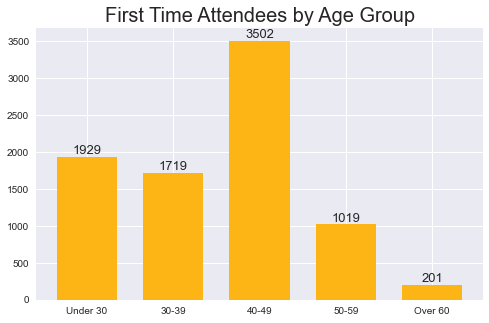

In [19]:
# Total First Time Attendees for each of the five age groups
ageGroupFirstTime = df.groupby('Age Group')['First Time Attendees'].sum()
ageGroupFirstTime = ageGroupFirstTime.reindex(cats)

# Bar chart for the Number of First Time Attendees in each age group
fig, ax = plt.subplots(figsize=(8,5)) 
ax.bar(ageGroupFirstTime.index, ageGroupFirstTime, width=0.7, color=['#fdb515'])

ax.set_title('First Time Attendees by Age Group', fontsize=20)

# Set the bar label  
numindex = np.arange(len(ageGroupFirstTime.index))
value = np.array(ageGroupFirstTime)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d' % b, ha ='center', va='bottom', fontsize=13)

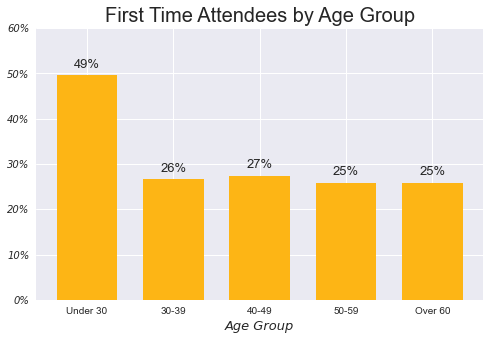

In [20]:
# Calculate the percentage of First Time Attendees for each age group
ageParticipated = df.groupby(["Age Group"])['Participated'].sum()
agePercentage = ageGroupFirstTime / ageParticipated
agePercentage = agePercentage.reindex(cats)

# Bar chart for the percentage of First Time Attendees for each age group
fig, ax = plt.subplots(figsize=(8,5)) 
num = ['0%','10%', '20%','30%','40%', '50%', '60%']

ax.bar(agePercentage.index, agePercentage, width=0.7, color=['#fdb515'])
ax.set_title('First Time Attendees by Age Group', fontsize=20)
ax.set_yticks(np.arange(0,0.7,0.1))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
plt.xlabel('Age Group',fontsize=13, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Set the bar label  
numindex = np.arange(len(agePercentage.index))
value = np.array(agePercentage)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

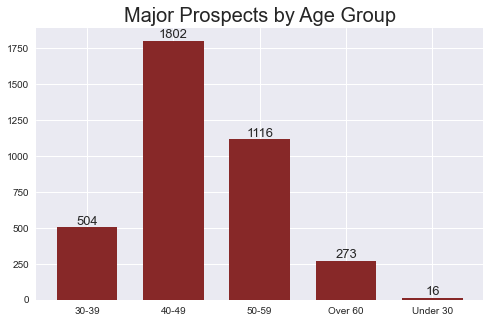

In [21]:
# Total Major Prospects for each of the three age groups
ageGroupMajorProspects = df.groupby('Age Group')['Major Prospects'].sum()
agePercentage = agePercentage.reindex(cats)

# Bar chart for the Number of Major Prospects in each age group
fig, ax = plt.subplots(figsize=(8,5)) 

ax.bar(ageGroupMajorProspects.index, ageGroupMajorProspects, width=0.7, color=['#872828'])

ax.set_title('Major Prospects by Age Group', fontsize=20)

# Set the bar label  
numindex = np.arange(len(ageGroupMajorProspects.index))
value = np.array(ageGroupMajorProspects)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d' % b, ha ='center', va='bottom', fontsize=13)

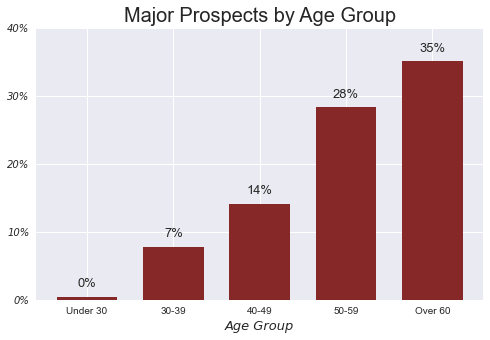

In [22]:
# Calculate the percentage of Major Prospects for each age group
agePercentage = ageGroupMajorProspects / ageParticipated
agePercentage = agePercentage.reindex(cats)

# Bar chart for the percentage of Major Prospects for each age group
fig, ax = plt.subplots(figsize=(8,5)) 
num = ['0%','10%', '20%','30%','40%']

ax.bar(agePercentage.index, agePercentage, width=0.7, color=['#872828'])
ax.set_title('Major Prospects by Age Group', fontsize=20)
ax.set_yticks(np.arange(0,0.5,0.1))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
plt.xlabel('Age Group',fontsize=13, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Set the bar label  
numindex = np.arange(len(agePercentage.index))
value = np.array(agePercentage)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

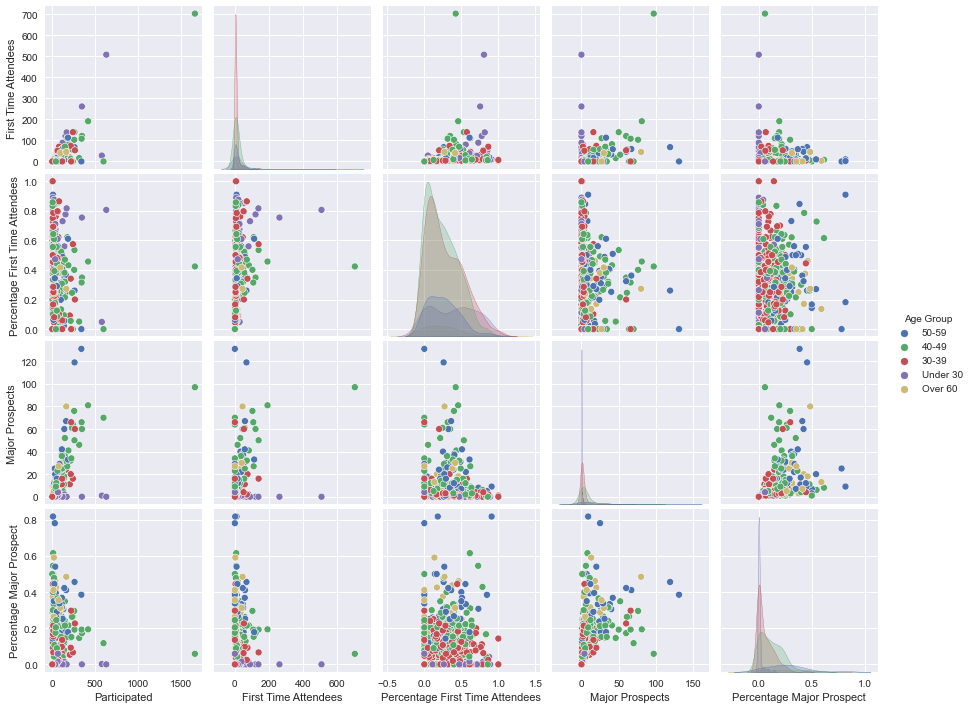

In [23]:
# Pairplot of the dataframe
sns.pairplot(df, hue='Age Group', 
             x_vars=['Participated', 'First Time Attendees', 'Percentage First Time Attendees', 'Major Prospects','Percentage Major Prospect'], 
             y_vars=['First Time Attendees', 'Percentage First Time Attendees', 'Major Prospects','Percentage Major Prospect'])

In [24]:
# Find out what day of the week each event is held and assign to a new column
day = []
for i in range(len(df)):
    day.append(pd.Timestamp.weekday(df['Event Date'][i]))

df['Day'] = day    
num = 0  
week = []
for i in day:
    if i == 0:
        week.append("Mon.")
    elif i == 1:
        week.append("Tue.")
    elif i == 2:
        week.append("Wed.")
    elif i == 3:
        week.append("Thu.")
    elif i == 4:
        week.append("Fri.")
    elif i == 5:
        week.append("Sat.")
    else:
        week.append("Sun.")       
        
df['Week'] = week
df

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Location Group,Group,Group Contents,Age Group,Day,Week
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476,DMV,General,Social,50-59,5,Sat.
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000,Online,General,ProDev,50-59,2,Wed.
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429,Northeast,General,ProDev,40-49,3,Thu.
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000,Northeast,General,Social,30-39,3,Thu.
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000,Northeast,General,Social,30-39,6,Sun.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,0,0.000000,0,0.000000,DMV,General,Social,30-39,1,Tue.
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,0,0.000000,27,0.355263,DMV,Students & Alumni,Social,Over 60,2,Wed.
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,0,0.000000,4,0.058824,DMV,Students & Alumni,Social,Under 30,2,Wed.
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,0,0.000000,16,0.135593,DMV,General,Advocacy,30-39,3,Thu.


## Analyzing Event Date

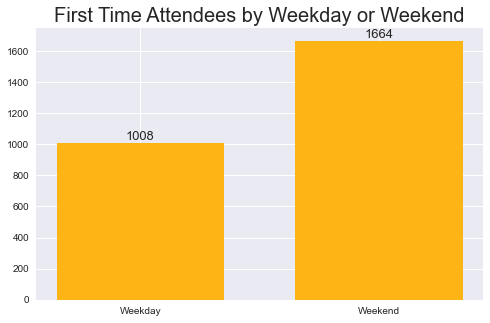

In [25]:
# Number of First Time Attendees for events held in weekday or weekend
WeekdayFirstTimeAttendees = df.groupby("Day")['First Time Attendees'].sum()[:5].sum() / 5
WeekendFirstTimeAttendees = df.groupby("Day")['First Time Attendees'].sum()[5:].sum() / 2

seriesWeek = pd.Series(data=[WeekdayFirstTimeAttendees, WeekendFirstTimeAttendees], index=['Weekday', 'Weekend'])

# Bar chart for the percentage of First Time Attendees in each group
fig, ax = plt.subplots(figsize=(8,5)) 

ax.bar(seriesWeek.index, seriesWeek, width=0.7, color=['#fdb515'])

ax.set_title('First Time Attendees by Weekday or Weekend', fontsize=20)

# Set the bar label  
numindex = np.arange(len(seriesWeek.index))
value = np.array(seriesWeek)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d' % b, ha ='center', va='bottom', fontsize=13)

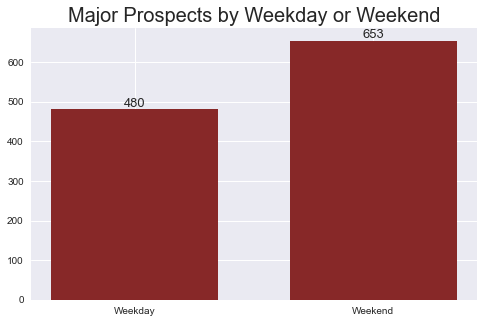

In [26]:
# Number of Major Prospects for events held in weekday or weekend
WeekdayMajorProspects = df.groupby("Day")['Major Prospects'].sum()[:5].sum() / 5
WeekendMajorProspects = df.groupby("Day")['Major Prospects'].sum()[5:].sum() / 2

seriesWeek = pd.Series(data=[WeekdayMajorProspects, WeekendMajorProspects], index=['Weekday', 'Weekend'])

# Bar chart for the percentage of First Time Attendees in each group
fig, ax = plt.subplots(figsize=(8,5)) 

ax.bar(seriesWeek.index, seriesWeek, width=0.7, color=['#872828'])

ax.set_title('Major Prospects by Weekday or Weekend', fontsize=20)

# Set the bar label  
numindex = np.arange(len(seriesWeek.index))
value = np.array(seriesWeek)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d' % b, ha ='center', va='bottom', fontsize=13)

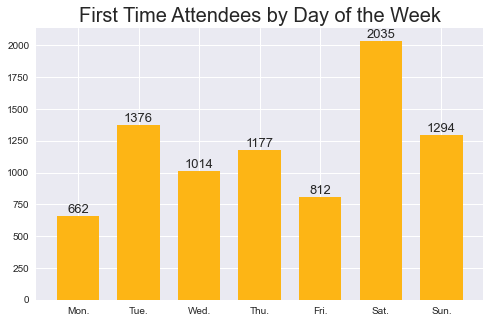

In [27]:
# Total First Time Attendees of each day of the week
cats = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.']
weekFirstTime = df.groupby(["Week"])['First Time Attendees'].sum().reindex(cats) 

# Bar chart for the First Time Attendees in each day
fig, ax = plt.subplots(figsize=(8,5)) 

ax.bar(weekFirstTime.index, weekFirstTime, width=0.7, color=['#fdb515'])

ax.set_title('First Time Attendees by Day of the Week', fontsize=20)

# Set the bar label  
numindex = np.arange(len(weekFirstTime.index))
value = np.array(weekFirstTime)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d' % b, ha ='center', va='bottom', fontsize=13)

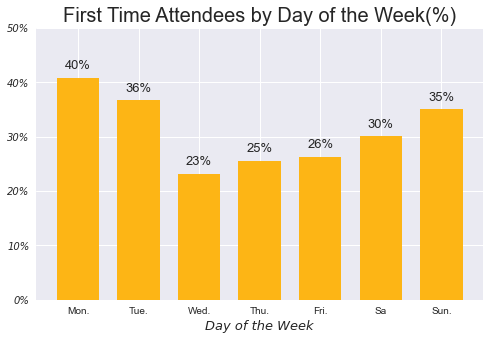

In [28]:
# Calculate the percentage of First Time Attendees of each day of the week
dayFirstTime = df.groupby(["Day"])['First Time Attendees'].sum()
dayParticipated = df.groupby(["Day"])['Participated'].sum()
dayPercentage = dayFirstTime / dayParticipated

# Bar chart for the percentage of First Time Attendees in each day
num = ['0%','10%', '20%','30%','40%', '50%']
fig, ax = plt.subplots(figsize=(8,5)) 

ax.bar(dayPercentage.index, dayPercentage, width=0.7, color=['#fdb515'])
ax.set_title('First Time Attendees by Day of the Week(%)', fontsize=20)
ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
plt.xticks(np.arange(7), ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sa', 'Sun.'])
plt.xlabel('Day of the Week',fontsize=13, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Set the bar label  
numindex = np.arange(len(dayPercentage.index))
value = np.array(dayPercentage)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

In [29]:
# Calculate the percentage of First Time Attendees of each day of the week
dayFirstTime = df.groupby(["Day"])['First Time Attendees'].sum()
dayParticipated = df.groupby(["Day"])['Participated'].sum()
dayPercentage = dayFirstTime / dayParticipated

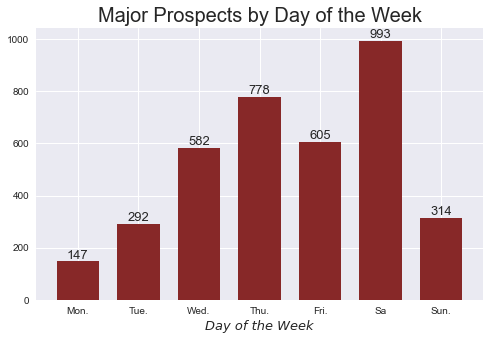

In [30]:
# Total Major Prospects of each day of the week
weekMajorProspect = df.groupby(["Week"])['Major Prospects'].sum().reindex(cats) 

# Bar chart for the percentage of First Time Attendees in each day 
fig, ax = plt.subplots(figsize=(8,5)) 

ax.bar(weekMajorProspect.index, weekMajorProspect, width=0.7, color=['#872828'])

ax.set_title('Major Prospects by Day of the Week', fontsize=20)
ax.set_yticks(np.arange(0,1200,200))
plt.xticks(np.arange(7), ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sa', 'Sun.'])
plt.xlabel('Day of the Week',fontsize=13, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Set the bar label  
numindex = np.arange(len(weekMajorProspect.index))
value = np.array(weekMajorProspect)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d' % b, ha ='center', va='bottom', fontsize=13)

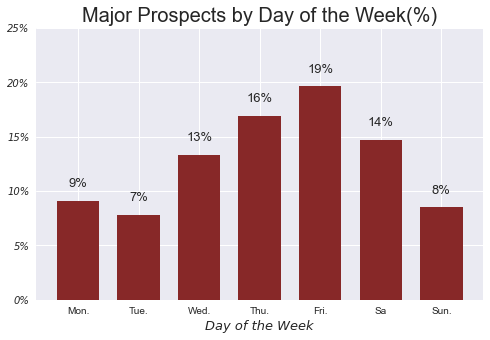

In [31]:
# Calculate the percentage of Major Prosepcts of each day of the week
dayMajorProspects = df.groupby(["Day"])['Major Prospects'].sum()
dayPercentage = dayMajorProspects / dayParticipated

# Bar chart for the percentage of First Time Attendees in each day
fig, ax = plt.subplots(figsize=(8,5)) 
num = ['0%','5%', '10%','15%','20%', '25%']

ax.bar(dayPercentage.index, dayPercentage, width=0.7, color=['#872828'])
ax.set_title('Major Prospects by Day of the Week(%)', fontsize=20)
ax.set_yticks(np.arange(0,0.3,0.05))
ax.set_yticklabels(num, fontfamily = 'DejaVu Sans', fontstyle='italic')
plt.xticks(np.arange(7), ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sa', 'Sun.'])
plt.xlabel('Day of the Week',fontsize=13, fontfamily = 'DejaVu Sans', fontstyle='italic')

# Set the bar label  
numindex = np.arange(len(dayPercentage.index))
value = np.array(dayPercentage)

for a, b in zip(numindex, value):
    ax.text(a,b+0.01, '%d%%' % (b*100), ha ='center', va='bottom', fontsize=13)

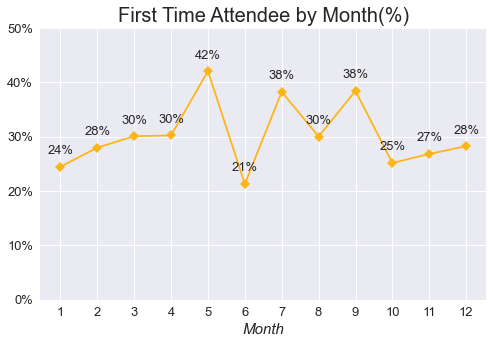

In [32]:
#Extract the month of each event and assign to a new column
df['Month'] = df["Event Date"].dt.month

# Total First Time Attendees in each month
monthFirstTimeAttendees = df.groupby('Month')['First Time Attendees'].sum()

# Calculate the percentage of First Time Attendees of each Month
monthParticipated = df.groupby(["Month"])['Participated'].sum()
monthPercentage = monthFirstTimeAttendees / monthParticipated

# plot the figure
fig, ax = plt.subplots(figsize=(8,5)) 

# line plot
y1 = ax.plot(monthPercentage.index, monthPercentage, marker='D', color='#fdb515')

ax.set_title('First Time Attendee by Month(%)',fontsize=20)
ax.set_xlabel('Month', fontsize=15,fontfamily = 'Arial',fontstyle='italic')
# ax.set_ylabel('Percentage', fontsize=15,fontfamily = 'Arial',fontstyle='oblique')

# Reset new y index
num = ['0%', '10%', '20%', '30%', '40%', '50%']

# Set x and y ticks
ax.set_xticks(ticks=range(1,13,1))
ax.xaxis.set_tick_params(labelsize=13,)
ax.set_yticks((0,0.1,0.2,0.3,0.4,0.5))
ax.set_yticklabels(num)
ax.yaxis.set_tick_params(labelsize=13)

# Set the bar label       
for x,y in zip(monthPercentage.index,monthPercentage):
    label = "{:.0f}%".format(y*100)
    ax.annotate(label, (x,y+0.005), textcoords="offset points", xytext=(0,10), ha='center', fontsize=13) 

# show the fugure
plt.show()

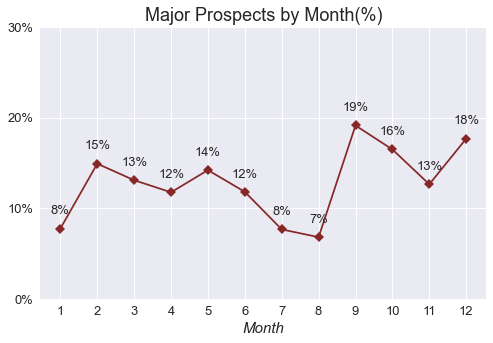

In [33]:
# Total Major Prospects in each month
monthMajorProspects = df.groupby('Month')['Major Prospects'].sum()

# Calculate the percentage of Major Prosepcts of each Month
monthPercentage = monthMajorProspects / monthParticipated

# plot the figure
fig, ax = plt.subplots(figsize=(8,5)) 
num = ['0%', '10%', '20%', '30%']

# line plot
y1 = ax.plot(monthPercentage.index, monthPercentage, marker='D', color='#872828')
ax.set_title('Major Prospects by Month(%)',fontsize=18)
ax.set_xlabel('Month', fontsize=15,fontfamily = 'Arial',fontstyle='italic')

# Set x and y ticks
ax.set_xticks(ticks=range(1,13,1))
ax.xaxis.set_tick_params(labelsize=13,)
ax.set_yticks((0,0.1,0.2,0.3))
ax.set_yticklabels(num)
ax.yaxis.set_tick_params(labelsize=13)

# Set the label       
for x,y in zip(monthPercentage.index,monthPercentage):
    label = "{:.0f}%".format(y*100)
    ax.annotate(label, (x,y+0.005), textcoords="offset points", xytext=(0,10), ha='center', fontsize=13) 

# show the fugure
plt.show()

## Regression Model

In [34]:
### Regression Model - First Time Attendee
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Step 1: Select the independent variables
x1 = df[['Participated']]
x2 = df[['Participated','Average Age']]
x3 = df[['Participated','Average Age','Month']]
x4 = df[['Participated','Location Group','Month','Week']]
x5 = df[['Participated','Average Age','Location Group','Group Contents']]


list = [x1, x2, x3, x4, x5]
model = 0

for x in list:
  # create dummy variables if any
    x = pd.get_dummies(x)
    x = x.values

  # Step 2: Select the dependent variable 
    y = df[['First Time Attendees']].values

  # Step 3: Split train and test data, and set the train size to 80%
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2, random_state=0)

  # Step 4: Fit the model(Using training data)
    res = LinearRegression().fit(x_train , y_train)

  # Step 5: Predict value
    yhat = res.predict(x_train)
    yhat_test = res.predict(x_test)
  

  # Step 6: Check the MSE value of the model
    MSE = mean_squared_error(y_train, yhat)

  # Step 7: Check the R-squared and Adjusted R-squared value
    con = sm.add_constant(x_train)
    result = sm.OLS(y_train, con).fit()

    model += 1
    print(' ')
    print('<Model %d>' % model)
    print('')

  # Step 8: Print the intercept, coeffient
    print(res.intercept_, res.coef_)
    print('Train-> R-squared value: %.2f, Adjusted R-squared value: %.2f, MSE: %.2f' % (result.rsquared, result.rsquared_adj, MSE))

print('\n', pd.get_dummies(x5).columns)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 
<Model 1>

[-2.81583509] [[0.3688773]]
Train-> R-squared value: 0.70, Adjusted R-squared value: 0.70, MSE: 614.01
 
<Model 2>

[13.67721726] [[ 0.37028868 -0.41265106]]
Train-> R-squared value: 0.71, Adjusted R-squared value: 0.71, MSE: 598.08
 
<Model 3>

[14.48769969] [[ 0.37033864 -0.41302821 -0.12409385]]
Train-> R-squared value: 0.71, Adjusted R-squared value: 0.71, MSE: 597.89
 
<Model 4>

[-1.09640539] [[ 0.36893917 -0.0324747  -1.07989005 -7.00279903  4.8293239   2.93956524
   0.20480193  0.10899801 -5.96285658  5.76404885 -0.16431247  3.22806476
  -1.057828    3.18137179 -4.98848834]]
Train-> R-squared value: 0.71, Adjusted R-squared value: 0.70, MSE: 597.39
 
<Model 5>

[9.30946622] [[  0.37675468  -0.39827721  -0.19074196  -8.43733885   2.71401898
    1.58377764   4.59084611  -0.26056192  -6.79472734   5.39835379
    3.42849769   3.69600442   4.62065207   5.98021625 -16.32899688]]
Train-> R-squared value: 0.72, Adjusted R-squared value: 0.71, MSE: 573.24

 Index(['Particip

In [35]:

### Regression Model - Major Prospects

# Step 1: Select the independent variables
x1 = df[['Participated']]
x2 = df[['Participated','Average Age']]
x3 = df[['Participated','Month']]
x4 = df[['Participated','Location Group','Month','Week']]
x5 = df[['Participated','Average Age','Group Contents','Month']]

list = [x1, x2, x3, x4, x5]
model = 0

for x in list:
# create dummy variables if any
    x = pd.get_dummies(x)
    x = x.values

# Step 2: Select the dependent variable 
    y = df[['Major Prospects']].values

# Step 3: Split train and test data, and set the train size to 80%
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2,random_state=0)

# Step 4: Fit the model(Using training data)
    res = LinearRegression().fit(x_train , y_train)

# Step 5: Predict value
    yhat = res.predict(x_train)
    yhat_test = res.predict(x_test)

# Step 6: Check the MSE value of the model
    MSE = mean_squared_error(y_train, yhat)


# Step 7: Check the R-squared and Adjusted R-squared value
    con2 = sm.add_constant(x_train)
    result = sm.OLS(y_train, con2).fit()

    model += 1
    print(' ')
    print('<Model %d>' % model)
    print('')
    
#Step 8: Print the intercept, coeffient, R-squared, and MSE
    print(res.intercept_, res.coef_)
    print('Train-> R-squared value: %.2f, Adjusted R-squared value: %.2f, MSE: %.2f' % (result.rsquared, result.rsquared_adj, MSE))

print("\n", pd.get_dummies(x5).columns)

 
<Model 1>

[1.8475968] [[0.09722024]]
Train-> R-squared value: 0.43, Adjusted R-squared value: 0.42, MSE: 133.50
 
<Model 2>

[-16.55949171] [[0.09564507 0.46053966]]
Train-> R-squared value: 0.51, Adjusted R-squared value: 0.51, MSE: 113.67
 
<Model 3>

[0.17953382] [[0.09711818 0.26023904]]
Train-> R-squared value: 0.43, Adjusted R-squared value: 0.43, MSE: 132.65
 
<Model 4>

[-0.19421554] [[ 0.09834594  0.27526137  0.17103132  3.61812588 -6.45775462 -0.01619447
   2.36220918  0.32258272  6.37577396 -1.89916205 -0.51362644 -3.43717364
   1.76264805 -3.48353392  1.19507403]]
Train-> R-squared value: 0.47, Adjusted R-squared value: 0.46, MSE: 122.40
 
<Model 5>

[-13.10915975] [[ 0.09043062  0.38790528  0.2981462  -1.85276668 -1.2086126  -2.8299973
  -4.41565607 -3.30492152 -2.86098431 16.47293848]]
Train-> R-squared value: 0.56, Adjusted R-squared value: 0.56, MSE: 101.57

 Index(['Participated', 'Average Age', 'Month', 'Group Contents_Advocacy',
       'Group Contents_Athletics', 